In [10]:
import numpy as np
import pandas as pd
from scipy.stats import ncx2, chi2, multivariate_normal
from scipy.spatial import distance
from scipy.linalg import fractional_matrix_power
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import plot_decision_regions

In [11]:
#Read data
data = pd.read_csv("./iris.data", header=None)
data = data.drop([0, 1], axis=1) #Only intersted in cols 3 & 4

In [12]:
idx = data.index[data[4] == 'Iris-versicolor'].tolist()
data_Versicolor = data.loc[idx]
# print(data_Versicolor)
data_Versicolor = data_Versicolor.drop([4], axis=1) #drop the label 

In [13]:
idx = data.index[data[4] == 'Iris-setosa'].tolist()
data_Setosa = data.loc[idx]
# print(data_Setosa)
data_Setosa = data_Setosa.drop([4], axis=1) #drop the label 


In [14]:
idx = data.index[data[4] == 'Iris-virginica'].tolist()
data_Virginica = data.loc[idx]
# print(data_virginica)
data_Virginica = data_Virginica.drop([4], axis=1) #drop the label 

In [15]:
set_trn = data_Setosa[0:10].values
ver_trn = data_Versicolor[0:10].values
vir_trn = data_Virginica[0:10].values

In [16]:
set_val = data_Setosa[10:30].values
ver_val = data_Versicolor[10:30].values
vir_val = data_Virginica[10:30].values

In [17]:
set_tst = data_Setosa[30:50].values
ver_tst = data_Versicolor[30:50].values
vir_tst = data_Virginica[30:50].values

In [18]:
trn = np.append(set_trn, ver_trn)
trn = np.append(trn , vir_trn)
trn = trn.reshape((30,2))

In [19]:
val = np.append(set_val, ver_val)
val = np.append(val , vir_val)
val = val.reshape((60,2))


In [20]:
tst = np.append(set_tst, ver_tst)
tst = np.append(tst , vir_tst)
tst = tst.reshape((60,2))

In [31]:
u_set = computeMean(trn[0:10])
# print(u_set)
u_ver = computeMean(trn[10:20])
# print(u_ver)
u_vir = computeMean(trn[20:30])
# print(u_vir)
u = np.concatenate((u_set, u_ver, u_vir), axis=0).reshape((3,2))
# u
# print("Estimated mean vector:")
# u_set

In [112]:
C_set = computeCov(trn[0:10], u_set)
C_ver = computeCov(trn[10:20], u_ver)
C_vir = computeCov(trn[20:30], u_vir)
C = np.concatenate((C_set, C_ver, C_vir), axis=0)
# print(C.reshape((3,2,2)))
C = np.array([C_set, C_ver, C_vir]) #Create 3D array to hold all Cov matri es


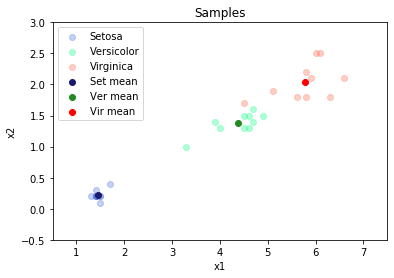

In [33]:
set_plt = plt.scatter(trn[0:10,0], trn[0:10,1], label="Setosa", c='royalblue', alpha=0.3)
ver_plt = plt.scatter(trn[10:20,0], trn[10:20,1], label="Versicolor", c='springgreen', alpha=0.3)
vir_plt = plt.scatter(trn[20:30,0], trn[20:30,1], label="Virginica", c='tomato', alpha=0.3)
set_mean = plt.scatter(u[0,0], u[0,1], label="Set mean", c='midnightblue')
ver_mean = plt.scatter(u[1,0], u[1,1], label="Ver mean", c='forestgreen')
vir_mean = plt.scatter(u[2,0], u[2,1], label="Vir mean", c='r')
plt.legend(handles=[set_plt, ver_plt, vir_plt, set_mean, ver_mean, vir_mean])
plt.title('Samples')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0.5, 7.5)
plt.ylim(-0.5, 3.0)
plt.show()

In [113]:
#For uncorrelated variates
C = uncorrCov(C)

In [102]:
# For isotropic variates
C = isotropicCov(C)

In [114]:
p = 0.5
gamma = 0.99
N = 10
D = 2
L = 3 # num of labels
tol_regs = np.empty((0,2), float) 
tol_rad = tolerance_radius(p, gamma, N, D)

for l in range(1,L+1):
    max = l*10
    min = max-10
    R = get_tol_reg_rad(trn[min:max], u[l-1], C[l-1], tol_rad)
    tol_regs = np.append(tol_regs, get_ellipse(R, C[l-1], u[l-1]))

tol_regs = tol_regs.reshape((300,2))


   

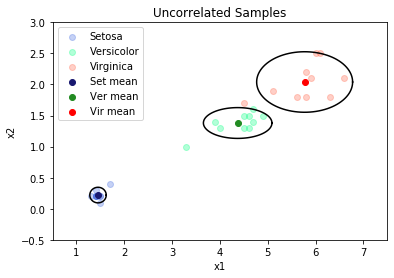

In [116]:
set_plt = plt.scatter(trn[0:10,0], trn[0:10,1], label="Setosa", c='royalblue', alpha=0.3)
ver_plt = plt.scatter(trn[10:20,0], trn[10:20,1], label="Versicolor", c='springgreen', alpha=0.3)
vir_plt = plt.scatter(trn[20:30,0], trn[20:30,1], label="Virginica", c='tomato', alpha=0.3)
set_mean = plt.scatter(u[0,0], u[0,1], label="Set mean", c='midnightblue')
ver_mean = plt.scatter(u[1,0], u[1,1], label="Ver mean", c='forestgreen')
vir_mean = plt.scatter(u[2,0], u[2,1], label="Vir mean", c='r')
plt.legend(handles=[set_plt, ver_plt, vir_plt, set_mean, ver_mean, vir_mean])
plt.title('Uncorrelated Samples')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0.5, 7.5)
# plt.ylim(0.5, 7.5)
plt.ylim(-0.5, 3.0)
plt.plot(tol_regs[0:100,0], tol_regs[0:100,1], c='black')
plt.plot(tol_regs[100:200,0], tol_regs[100:200,1], c='black')
plt.plot(tol_regs[200:300,0], tol_regs[200:300,1], c='black')
plt.show()

In [107]:
class LQDA:
    p = [10, 10, 10]
    L = 3
    def predict(x):
        N = x.shape[0]
        y_hat = np.empty([N], dtype=int)
        for n in range(N):
            l_hat = np.empty([L], dtype=float) 
            for k in range(0,L):
                # print(x[n])
                pred =-1/2*ln(det(C[k]))-1/2*mahalanobis_dist(x[n], u[k], C[k])+ln(p[k])
                l_hat[k] = pred
            y_hat[n] = np.argmax(l_hat)

        return y_hat

In [108]:
p = [10, 10, 10] #Prior num of samples for each class
L = 3
# for i in range(0,30):
#     l_hat = LQDA.predict(trn[i])
print(LQDA.predict(trn))


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2]


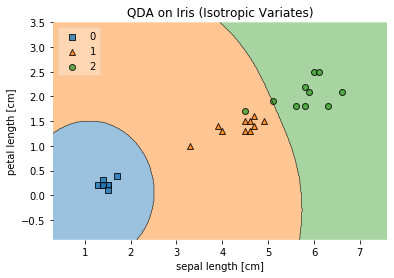

In [110]:
y = np.concatenate((np.full((10), 0), np.full((10), 1), np.full((10), 2))) #Generates true labels (quick hack ;))
plot_decision_regions(trn, y, clf=LQDA, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('QDA on Iris (Uncorrelated Variates)')
plt.show()

Overall the classifer does a good job of discriminating between samples from the training data. From looking at the previous tolerange region plot, we notice the overalap between the region of class 1 (Versicolor) and that of class 2 (Virginica). It was therefore expected that the model might miclassify some Virginica samples (those close to the decision boudary) as coming from the Versicolor batch. 

In [109]:
def LQDA_predict(x, C, u, L, p):
    l_hat = np.empty([L], dtype=float) 
    for k in range(0,L):
        pred =-1/2*ln(det(C[k]))-1/2*mahalanobis_dist(x, u[k], C[k])+ln(p[k])
        l_hat[k] = pred

    return l_hat



In [22]:
def det(X):
    return np.linalg.det(X)

In [23]:
def ln(x):
    return np.log(x)

In [24]:
def get_tol_reg_rad(data, u, C, tol_rad):
    N = data.shape[0]
    R = np.empty((0,2), float) 
    max_R = -1

    for n in range(1, N):
        x = data[n]
        mhnbs_dist = mahalanobis_dist(x, u, C)
        if (mhnbs_dist <= tol_rad):
            x = x.reshape((1,2))
            R = np.append(R, x, axis=0)
            if (mhnbs_dist > max_R): #to find the farthest point from mean for a given p% tolerace
                farthest_point = x
                max_R = mhnbs_dist

    return max_R

In [25]:
def computeMean(X):
    N = X.shape[0]
    mean = np.sum(X, axis=0)/N
    return mean.reshape((2,1))

In [82]:
def computeCov(X, u):
    # u = u.reshape((2,1))
    uuT = u*(u.T)
    N = X.shape[0]
    cn = np.zeros((2, 2))
    for n in range(N):
        x = X[n]
        x = x.reshape((2, 1))
        cn += x*(x.T) - uuT
    return cn/N

In [79]:
def uncorrCov(C):
    N = C.shape[0]
    for i in range(N):
        C[i] = np.diag(np.diag(C[i]))
    return C

In [99]:
def isotropicCov(C):
    N = C.shape[0]
    D = C.shape[1]
    for i in range(N):
        C[i] = 1/D*np.trace(C[i])*np.identity(2)
    return C

In [27]:
def get_ellipse(r, C, u):

    A = np.linalg.inv(C)
    lmda, V = np.linalg.eig(A)
    L = np.diag(lmda)
    B = V.dot(fractional_matrix_power(L, -0.5))

    x_t = np.empty((0,2), float)
    # print(x_t.shape)
    for t in np.linspace(0, 2*np.pi, 100):
        unit = np.array([np.cos(t), np.sin(t)])
        u = u.reshape((2,1))
        unit = unit.reshape((2,1))
        temp_x_t = r*B.dot(unit) + u
        temp_x_t = temp_x_t.reshape((1,2))
        x_t = np.append(x_t, (temp_x_t) , axis=0)
    
    return x_t
        # x_t = r*B.dot(unit) + u

In [28]:
def tolerance_radius(p, gamma, N, D):
    df_cnx2 = D
    df_x2 = (N-1)*D
    nc = D/N #Non centrality param
    return np.sqrt(N*D*ncx2.ppf(p, df_cnx2, nc)/(chi2.ppf((1-gamma), df_x2)))

In [29]:
def tolerance_radius(p, gamma, N, D):
    df_cnx2 = D
    df_x2 = (N-1)*D
    nc = D/N #Non centrality param
    return np.sqrt(N*D*ncx2.ppf(p, df_cnx2, nc)/(chi2.ppf((1-gamma), df_x2)))

In [30]:
def mahalanobis_dist(x, u, C):
    C_inv = np.linalg.inv(C)
    y = (x-u).reshape((1,2))
    i = y.dot(C_inv)
    return float(np.sqrt(i.dot(y.T)))
